# Exam

## 1. Numpy basics

### Outer product

Find the outer product of the following two vectors
```
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

- Using the function outer in numpy
- Using a nested for loop or list comprehension
- Using numpy broadcasting operatoins

In [5]:
import numpy as np

u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

# using numpy function
outer1 = np.outer(u,v)
print(outer1)

# using list comprehension
outer2 = np.array([x * y for x in u for y in v]).reshape((len(v),len(u)))
print(outer2)

# using broadcasting operation
u = u.reshape((len(u),1))
outer3 = u * v
print(outer3)

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


## 2. Visualization

### Profile plot

Produce a profile plot from a scatter plot.

Download the following dataset:

```wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy```

and load it as a pandas dataframe.

Note that you should use the ```np.load()``` function to load the file as a numpy array, call the ```.item()``` method, and then pass it to the ```pd.DataFrame()``` constructor.

- Inspect the dataset, you'll find two variables (features).
- Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
- Perform a linear regression of "residuals" versus "distances" using ```scipy.stats.linregress()```.
- Plot a seaborn jointplot of "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot.
- Fill 3 numpy arrays:
 - ```x```, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins).
 - ```y```, the mean values of the "residuals", estimated in slices (bins) of "distance".
 - ```erry```, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance".

- Plot the profile plot on top of the scatter plot.

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

In [7]:
# ! wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

In [8]:
data = np.load('residuals_261.npy', allow_pickle=True)
data_res = pd.DataFrame(data.item())
data_res[:10] #visualize just few entries

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
5,-11.020000,4.4
6,-2.270000,0.6
7,-2.160000,19.0
8,-0.042857,3.3
9,0.128571,5.3


In [9]:
# clean the data
data_res = data_res[np.abs(data_res['residuals']) < 2]
data_res[:10]

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
11,-0.130000,9.3
12,-0.090000,10.2
13,0.210000,12.2
14,0.170000,7.9
15,0.042857,4.5


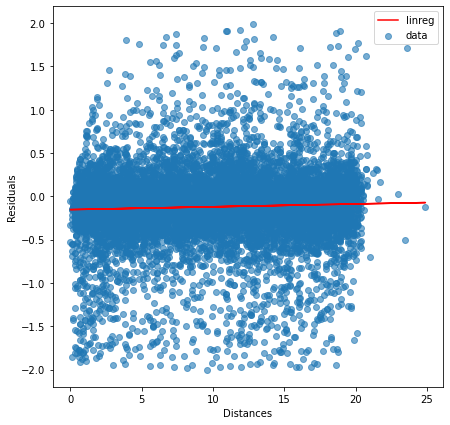

In [10]:
# linear regression with scipy
linreg = stats.linregress(data_res['distances'], data_res['residuals'])

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(data_res['distances'], data_res['residuals'], alpha=.6, label='data')
ax.plot(data_res['distances'], linreg.slope * data_res['distances'] + linreg.intercept, color='r', label='linreg')
ax.set_xlabel('Distances')
ax.set_ylabel('Residuals')
_ = ax.legend()

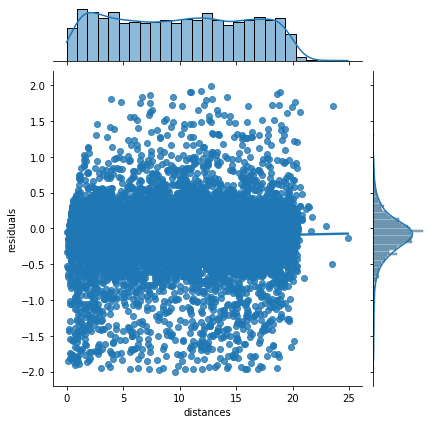

In [11]:
# perform a linear regression using a seaborn jointplot
_=sns.jointplot(x = 'distances', y = 'residuals', data=data_res, kind='reg')
# don't remember jointplot parameter to change the color of the line

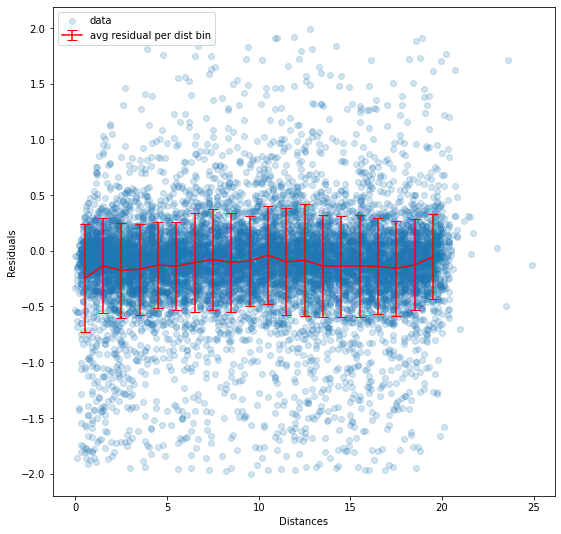

In [12]:
# creating and filling the required arrays: x, y and erry
edges = np.linspace(0,20,21)
x = np.empty(shape=(len(edges)-1)) # array of bin centers
for i in range(1,len(edges)):
    x[i-1] = (edges[i] + edges[i-1]) / 2
    
y = []
half_bin = (edges[1] - edges[0]) / 2
for center in x:
    temp = data_res[data_res['distances'] < center + half_bin]
    temp = temp[temp['distances'] >= center - half_bin]
    y.append(np.mean(temp['residuals']))
y = np.array(y)

erry = []
for center in x:
    temp = data_res[data_res['distances'] < center + half_bin]
    temp = temp[temp['distances'] >= center - half_bin]
    erry.append(np.std(temp['residuals']))
erry = np.array(erry)

fig, ax = plt.subplots(figsize=(9,9))
ax.scatter(data_res['distances'], data_res['residuals'], alpha=.2, label='data')
ax.errorbar(x,y,erry,color='r',capsize=5, label='avg residual per dist bin')
ax.set_xlabel('Distances')
ax.set_ylabel('Residuals')
_ = ax.legend()

## 3. Algorithms

### FFT of an image

Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
- Load the image using `pylab.imread()`.
- Find and use the 2-D FFT function in `scipy.fftpack`, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
- The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
- Apply the inverse Fourier transform to see the resulting image.

<class 'numpy.ndarray'>


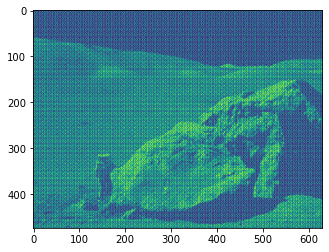

In [13]:
from scipy import fftpack
image = plt.imread('moonlanding.png')
print(type(image))
_=plt.imshow(image)

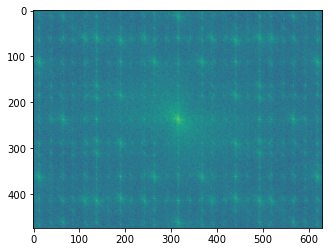

In [14]:
image_fft = fftpack.fft2(image) # apply the package function for 2d fft
image_fft_shifted = fftpack.fftshift(image_fft) # perform a shift in order to center the following power plot
image_power = np.log(np.abs(image_fft_shifted)) # calculate the power
_=plt.imshow(image_power)

C:\Users\Giovanni\AppData\Local\Temp/ipykernel_6356/2514744206.py:7: RuntimeWarning: divide by zero encountered in log
  filtered_image_power = np.log(np.abs(image_fft_shifted)) # calculate again the power


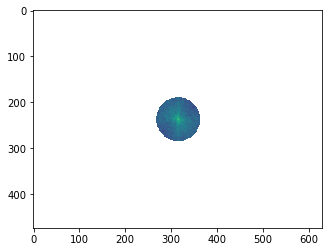

In [15]:
freq_mask = np.ones(shape=(image.shape),dtype='bool') # create a boolean mask of the same shape of the image
R = 50
center = np.array([int(image.shape[1] / 2), int(image.shape[0] / 2)]) # create coordinates of the image center
xx, yy = np.meshgrid(range(image.shape[1]),range(image.shape[0]))
freq_mask = np.sqrt((xx-center[0])**2 + (yy-center[1])**2) >= R
image_fft_shifted[freq_mask] = 0 # setting to zero all the fft outputs exceeding the area delimited by R
filtered_image_power = np.log(np.abs(image_fft_shifted)) # calculate again the power
_ = plt.imshow(filtered_image_power) 

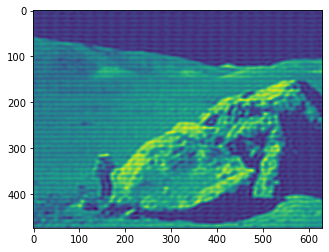

In [16]:
filtered_image_fft = fftpack.ifftshift(image_fft_shifted) # apply the inverse shift on the masked and shifted fft
filtered_image = fftpack.ifft2(filtered_image_fft) # apply the inverse fft
filtered_image = np.abs(filtered_image)
_ = plt.imshow(filtered_image) # plot the filtered image

## 4. Monte Carlo

### Monte Carlo integration in high dimension

- Start of by computing the area of a circle of unit radius, by integrating the function
 $$ f(x,y) = \begin{cases}
                        1 \,\,\,\,\text{if $x^2+y^2\le 1$} \\
                        0 \,\,\,\,\text{elsewhere}
                    \end{cases}
 $$
- Generalize the result for a 10D sphere

In [17]:
# consider the unitary circle confined in a square box of area A = 4 with vertexes (-1,-1),(1,-1),(1,1),(-1,1)
R = 1 
N = 10000
A = 4
points = stats.uniform.rvs(loc = -1, scale = 2, size=((N,2)))

Computed integral: 3.1408


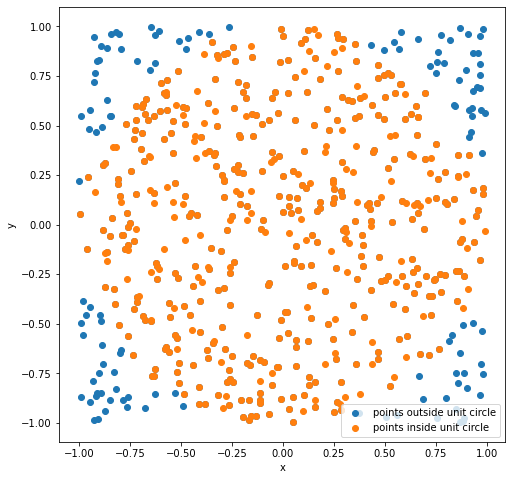

In [18]:
distances = np.empty(shape=(N,))
for i,point in enumerate(points):
    distances[i] = np.sqrt(point[0]**2+point[1]**2)
k = np.sum(distances<R)
inside_points = points[distances<=R]
I = (A * k) / N
print(f'Computed integral: {I}')
fig, ax = plt.subplots(figsize=(8,8)) # plot just to check the correctness
ax.scatter(points[:500,0], points[:500,1],label='points outside unit circle')
ax.scatter(inside_points[:500,0], inside_points[:500,1],label='points inside unit circle')
ax.set_xlabel('x')
ax.set_ylabel('y')
_=ax.legend()

In [26]:
# generalize for arbitrary dimension
d = 10
d_dimV = 2 ** d
points = stats.uniform.rvs(loc = -1, scale = 2, size=((N,d)))
for i,point in enumerate(points):
    distances[i] = np.linalg.norm(point)
k = np.sum(distances<=R)
I = (d_dimV * k) / N
print(f'Computed integral: {I}')

Computed integral: 3.1744
